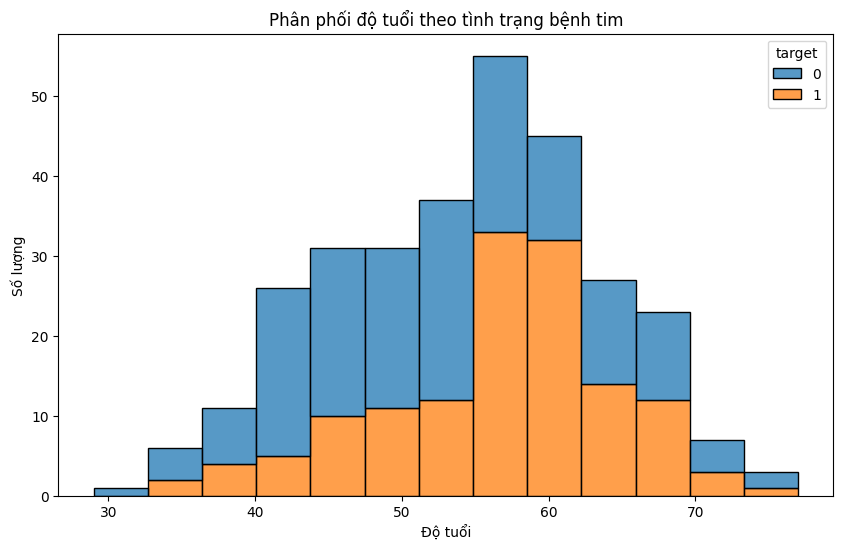

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuyển đổi cột target
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị missing cho 'thal' và 'ca'
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Phân phối tuổi theo target (1 - Bệnh tim, 0 - Không bệnh tim)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=False)

# Thiết lập tiêu đề và nhãn trục
plt.title('Phân phối độ tuổi theo tình trạng bệnh tim')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

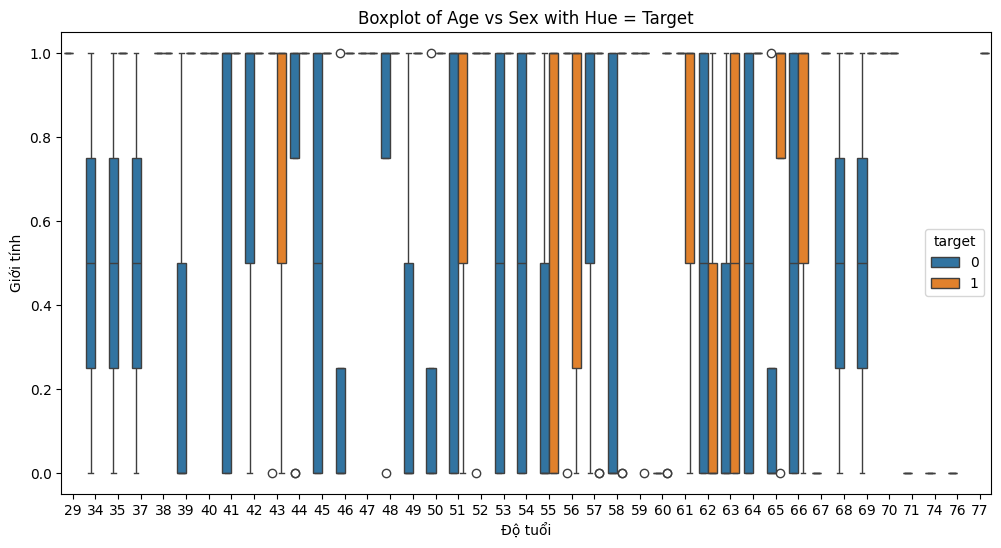

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuyển đổi cột target
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị missing cho 'thal' và 'ca'
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Sử dụng boxplot để hiển thị mối quan hệ giữa tuổi, giới tính, và tình trạng bệnh tim
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='sex', hue='target', data=df)

# Thiết lập tiêu đề và nhãn trục
plt.title('Boxplot of Age vs Sex with Hue = Target')
plt.xlabel('Độ tuổi')
plt.ylabel('Giới tính')

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Đọc dữ liệu từ file
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuyển đổi cột target
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị missing cho 'thal' và 'ca'
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Chia tập dữ liệu thành X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN với các tham số yêu cầu
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm thử
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Tạo ma trận nhầm lẫn cho tập huấn luyện và tập kiểm thử
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Tính toán độ chính xác cho tập huấn luyện và kiểm thử
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [ ]:
# Bài tập 4: Sử dụng SVM cho dự đoán bệnh tim
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Đọc dữ liệu từ file
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuyển đổi cột target
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị missing cho 'thal' và 'ca'
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Chia tập dữ liệu thành X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình SVM với kernel 'rbf'
svm_model = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm thử
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Tạo ma trận nhầm lẫn cho tập huấn luyện và tập kiểm thử
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Tính toán độ chính xác cho tập huấn luyện và kiểm thử
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [ ]:
# Bài tập 5: Sử dụng Naive Bayes cho dự đoán bệnh tim
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Đọc dữ liệu từ file
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuyển đổi cột target
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị thiếu cho 'thal' và 'ca'
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Chia tập dữ liệu thành X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Naive Bayes
nb_model = GaussianNB()

# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm thử
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# Tạo ma trận nhầm lẫn cho tập huấn luyện và tập kiểm thử
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Tính toán độ chính xác cho tập huấn luyện và kiểm thử
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84
